# Task : 02
    
Name : Rahat Qayyum
    
***GRIPFEBRUARY23***


 ###**Supervised Learning With Linear Regression**
    
Problem statement : Predict the percentage of an student based on the no. of study hour. Also find the predicted score if a student studies for 9.25 hrs/day ?

In [31]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Reading the dataset

data = pd.read_csv("student_scores.csv")
print("Data has been imported successfully.")
data.head(10)

Data has been imported successfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


First Let's plot our data to check if our dataset can manually find any relationship.

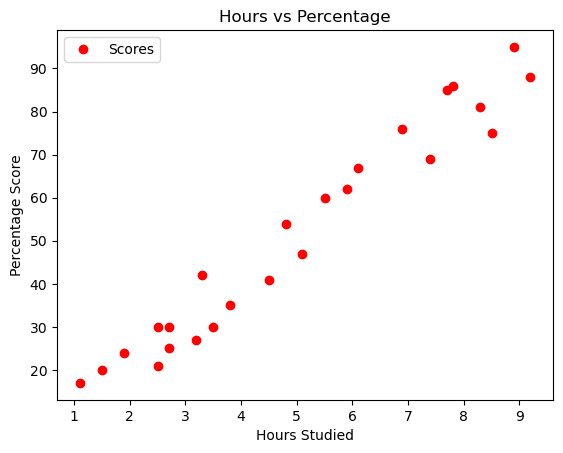

In [33]:
# Plotting the data

data.plot(x = "Hours", y = "Scores", style = 'o', color = "red")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

# Exploratory Data Analysis

In [34]:
data.shape

(25, 2)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [36]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **From the graph above we can clearly see that there is a positive linear relation between the no. of hours studied and percentage scores.**

Let us extract the Target and feature variables.The Target value is dependent whereas as the Feature variable is independent.

In [37]:
X = data.iloc[:, :-1].values
y = data.iloc[:,1].values
y                                          

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the data into Training and Testing sets using Scikit-Learn's module.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

# Training the Algorithm.

In [46]:
# Importing the module for traning the Algorithm which is Linear Regression.

from sklearn.linear_model import LinearRegression

# Declaring the object instance.

regression = LinearRegression()
regression.fit(X_train.reshape(-1,1), y_train)

print("Training complete.")

Training complete.


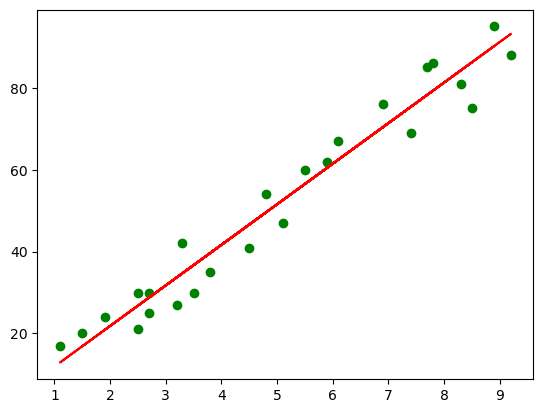

In [47]:
# Since the data has been fit, now plotting Linear Regression line.

line = regression.coef_*X+regression.intercept_     # y = m * x + c

#Plotting the line.

plt.scatter(X, y, color="green")
plt.plot(X, line, color="red")
plt.show()

# Making Predictions

Now that we have successfully trained out algorithm, its time to make some predictions.

In [48]:
print(X_test)       # In Hours
y_pred = regression.predict(X_test)      #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual vs Predicted.



In [53]:
data = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [51]:
# You can also test with your own data
hours = 9.25
own_pred = regression.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [54]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
